In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('./Datasets/OnlineRetail.csv',encoding='Latin')

In [34]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [36]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [37]:
df.shape

(541909, 8)

In [38]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [65]:
print(df['Country'].value_counts())

Country
United Kingdom          483577
Germany                   9031
France                    8386
EIRE                      7780
Spain                     2473
Netherlands               2071
Belgium                   2029
Switzerland               1966
Portugal                  1501
Norway                    1068
Australia                 1044
Italy                      757
Channel Islands            743
Finland                    685
Cyprus                     611
Unspecified                446
Austria                    396
Denmark                    377
Sweden                     377
Poland                     330
Japan                      300
Israel                     295
Hong Kong                  284
Singapore                  221
Iceland                    181
USA                        179
Canada                     149
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         58


In [40]:
df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,-80995.00,1.00,3.00,29.00,100.0,80995.0,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,-11062.06,0.42,2.08,9.95,18.0,38970.0,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,12346.00,12626.00,15152.00,17905.00,18212.0,18287.0,18287.0


In [41]:
# Let's detect and remove outliers

q1 = df['Quantity'].quantile(0.01)
q3 = df['Quantity'].quantile(0.99)
iqr = q3-q1

lb = q1 - (1.5 * iqr)
ub = q3 + (1.5 * iqr)

print("q1", q1)
print("q3", q3)
print("iqr", iqr)
print("lb", lb)
print("ub", ub)

q1 -2.0
q3 100.0
iqr 102.0
lb -155.0
ub 253.0


In [42]:
df.loc[df['Quantity']> ub, 'Quantity'] = ub
df.loc[df['Quantity'] < lb, 'Quantity'] = lb

{'whiskers': [<matplotlib.lines.Line2D at 0x24dcdc79220>,
 'caps': [<matplotlib.lines.Line2D at 0x24dcdc79700>,
 'boxes': [<matplotlib.lines.Line2D at 0x24dcdc78f20>],
 'medians': [<matplotlib.lines.Line2D at 0x24dcdc79bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24dcdc79e80>],
 'means': []}

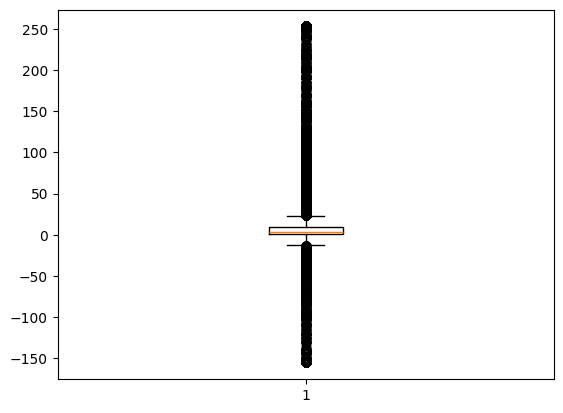

In [43]:
plt.boxplot(df['Quantity'])

In [44]:
q1 = df['UnitPrice'].quantile(0.01)
q3 = df['UnitPrice'].quantile(0.99)
iqr = q3-q1

lb = q1 - (1.5 * iqr)
ub = q3 + (1.5 * iqr)

print("q1", q1)
print("q3", q3)
print("iqr", iqr)
print("lb", lb)
print("ub", ub)

q1 0.19
q3 18.0
iqr 17.81
lb -26.524999999999995
ub 44.714999999999996


In [45]:
df.loc[df['UnitPrice']> ub, 'UnitPrice'] = ub
df.loc[df['UnitPrice'] < lb, 'UnitPrice'] = lb

{'whiskers': [<matplotlib.lines.Line2D at 0x24dcdcd6210>,
 'caps': [<matplotlib.lines.Line2D at 0x24dcdcd6810>,
 'boxes': [<matplotlib.lines.Line2D at 0x24dcdcd5ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x24dcdcd6db0>],
 'fliers': [<matplotlib.lines.Line2D at 0x24dcdcd7080>],
 'means': []}

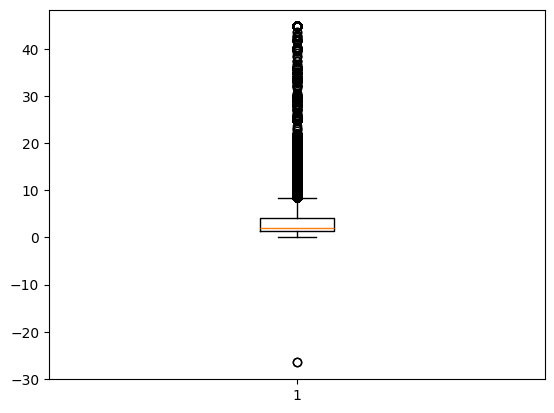

In [46]:
plt.boxplot(df['UnitPrice'])

In [47]:
df.describe([0, 0.05, 0.5, 0.99, 1]).T

,count,mean,std,min,0%,5%,50%,99%,100%,max
Quantity,541909.0,9.130489,22.300513,-155.000,-155.000,1.00,3.00,100.0,253.000,253.000
UnitPrice,541909.0,3.368006,4.116091,-26.525,-26.525,0.42,2.08,18.0,44.715,44.715
CustomerID,406829.0,15287.690570,1713.600303,12346.000,12346.000,12626.00,15152.00,18212.0,18287.000,18287.000


In [48]:
df = df[(df['Quantity'] >= 0) & (df['UnitPrice'] >= 0)]

<Axes: >

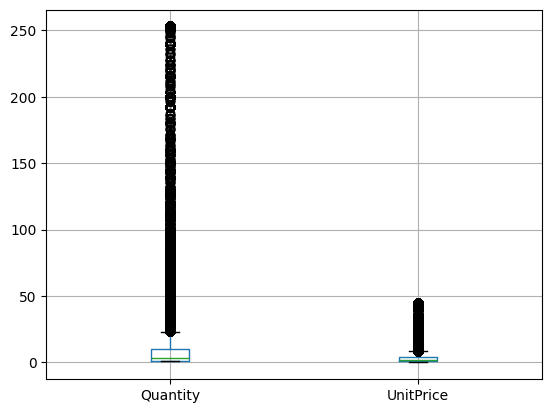

In [49]:
df.boxplot(['Quantity','UnitPrice'])

In [50]:
df = df[df['Quantity'] < 150]

In [51]:
df.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T

,count,mean,std,min,0%,5%,50%,95%,99%,100%,max
Quantity,528418.0,8.431972,14.776869,1.0,1.0,1.00,3.00,25.00,96.00,149.000,149.000
UnitPrice,528418.0,3.347981,3.992863,0.0,0.0,0.42,2.08,9.95,16.98,44.715,44.715
CustomerID,395221.0,15293.213842,1712.276647,12347.0,12347.0,12627.00,15157.00,17904.00,18212.00,18287.000,18287.000


In [52]:
df['CustomerID'] = df['CustomerID'].fillna(0)

In [53]:
df.isnull().sum()

InvoiceNo        0
StockCode        0
Description    554
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
dtype: int64

In [54]:
df.dropna(subset=['Description'],inplace=True)

In [55]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [56]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527864 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    527864 non-null  object 
 1   StockCode    527864 non-null  object 
 2   Description  527864 non-null  object 
 3   Quantity     527864 non-null  int64  
 4   InvoiceDate  527864 non-null  object 
 5   UnitPrice    527864 non-null  float64
 6   CustomerID   527864 non-null  float64
 7   Country      527864 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.2+ MB


In [58]:
# df = pd.get_dummies(df,columns=['Country'], drop_first=True)

In [59]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
